<a href="https://colab.research.google.com/github/wanderer2285/Data-Science-Project/blob/main/amazon_reviews_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install jupyterthemes

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme to ensure that we are able to see the x and y axes clearly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.4 MB/s eta 0:00:00


In [3]:
# Load the data
reviews_df = pd.read_csv('amazon_reviews.csv')
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


<Axes: xlabel='rating', ylabel='count'>

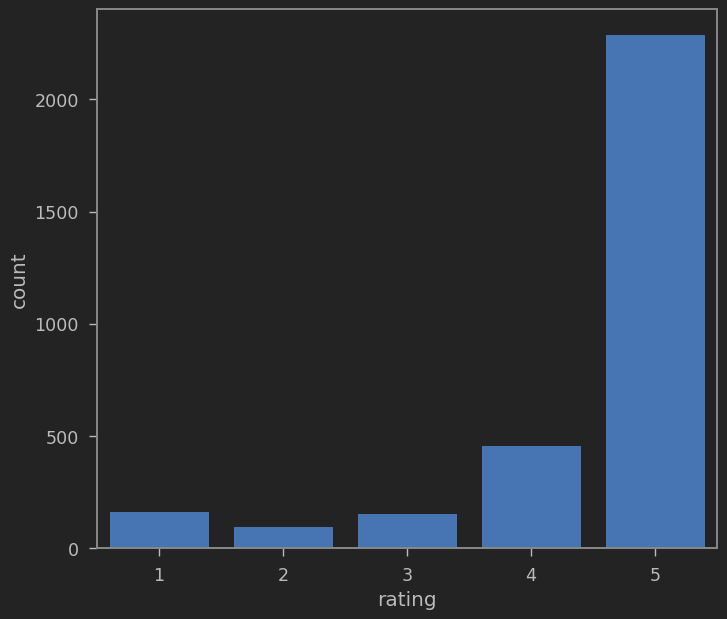

In [6]:
sns.countplot(x= reviews_df['rating'])

In [9]:
#length of verified reviews column
reviews_df['length'] = reviews_df['verified_reviews'].dropna().apply(len)


<Axes: ylabel='Frequency'>

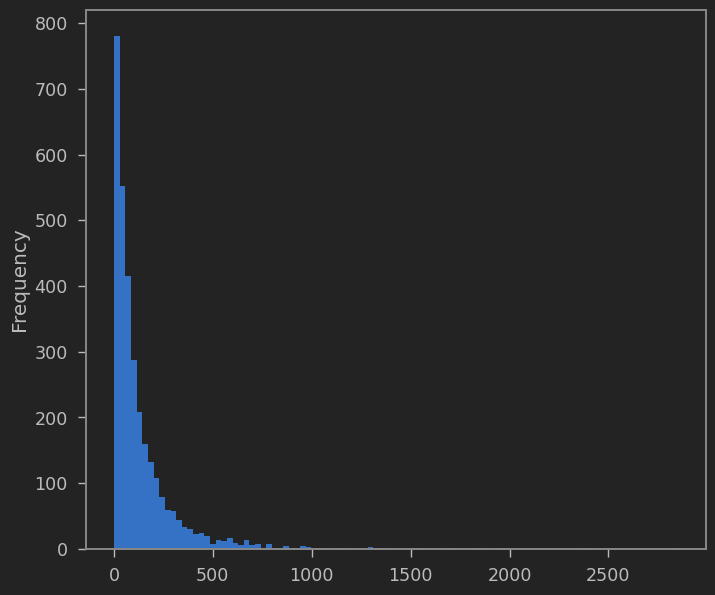

In [10]:
reviews_df['length'].plot(bins = 100, kind='hist')

<Axes: xlabel='feedback', ylabel='count'>

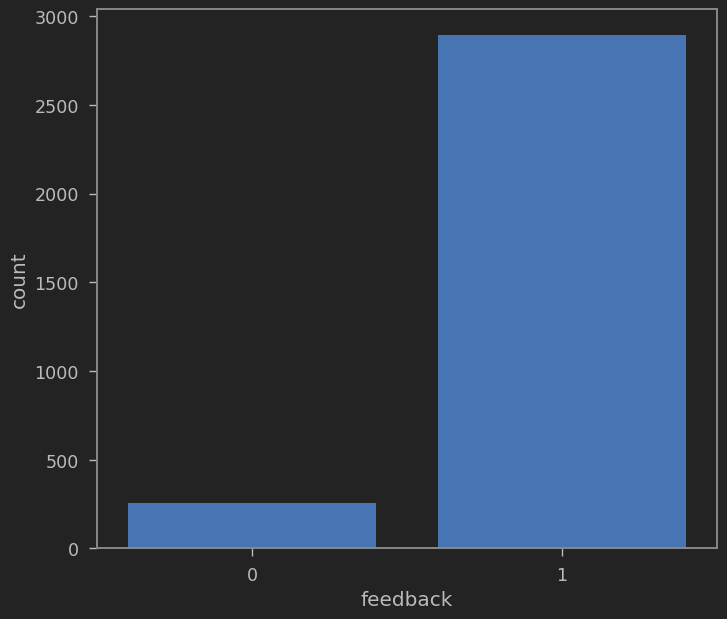

In [11]:
#plotting countlpot for feedback
sns.countplot(x = reviews_df['feedback'])

In [12]:
positive = reviews_df[reviews_df['feedback'] == 1]
negative = reviews_df[reviews_df['feedback'] == 0]

In [13]:
sentences = positive['verified_reviews'].tolist()
len(sentences)

2893

In [14]:
#join all reveiws into one large string
sentences_as_one_string = " ".join(sentences)
#sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

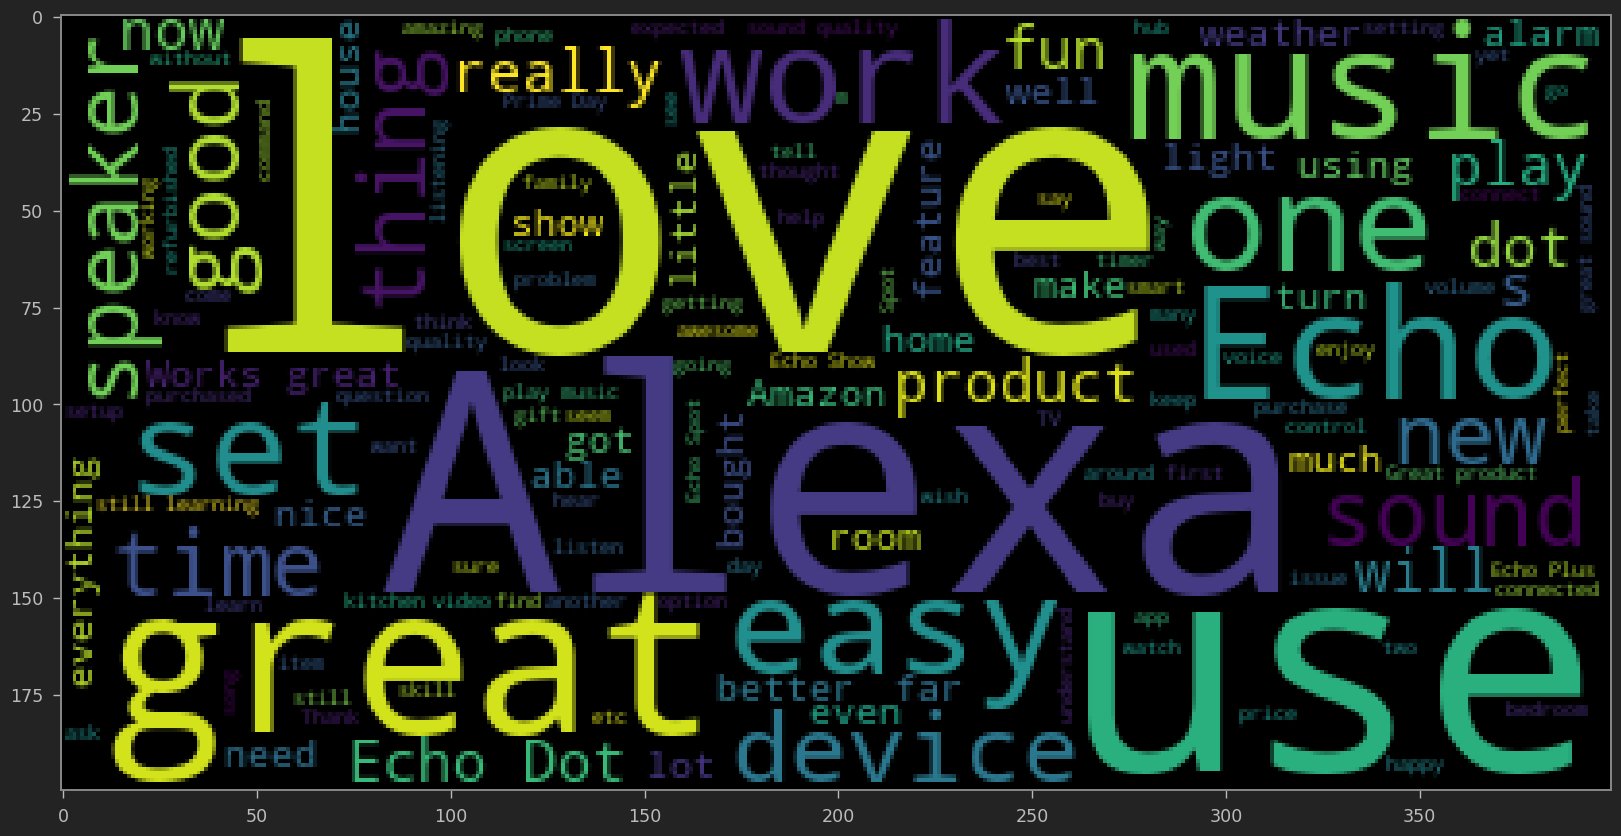

In [15]:
from wordcloud import WordCloud

plt.figure(figsize =(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [17]:
sentences = negative['verified_reviews'].tolist()
len(sentences)


257

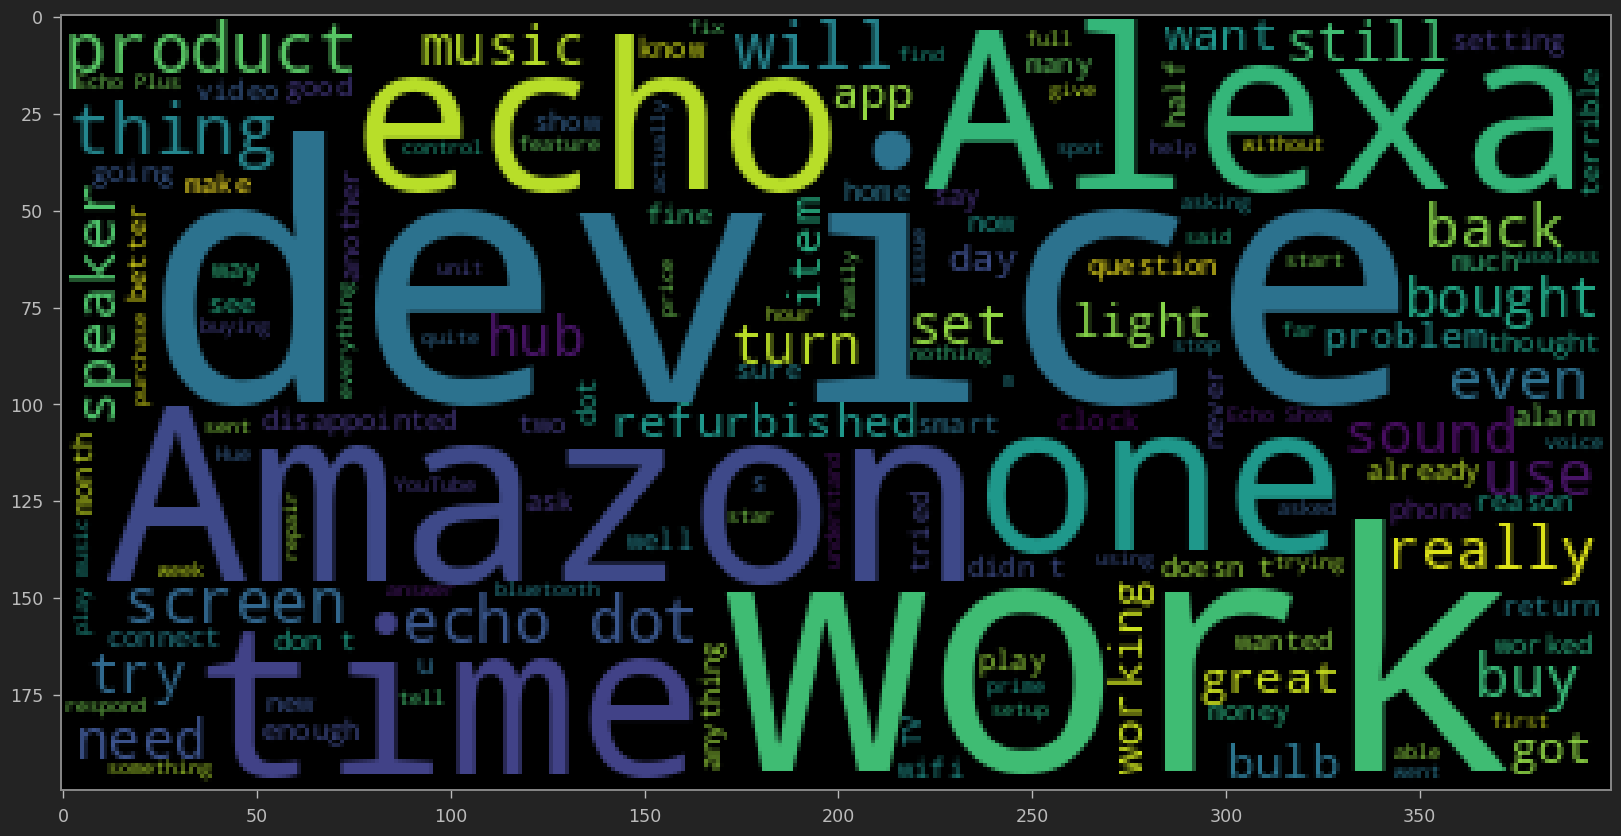

In [19]:
sentences_as_one_string =" ".join(map(str, sentences))
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [26]:
import string
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
def message_cleaning(message):
  if not isinstance(message, str):  # Convert non-strings to an empty string
    message = ""
  Test_punc_removed = [char for char in message if char not in string.punctuation]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  return Test_punc_removed_join_clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [28]:
#original review
print(reviews_df['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [29]:
#cleaned review
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
#define the cleaning pipeline
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].fillna("")

vectorizer = CountVectorizer(analyzer  = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [33]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [34]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
reviews_countvectorizer.shape

(3150, 5211)

In [37]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
X = reviews
y = reviews_df['feedback']
y

,feedback
0,1
1,1
2,1
3,1
4,1
...,...
3145,1
3146,1
3147,1
3148,1


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)


MultinomialNB()

<Axes: >

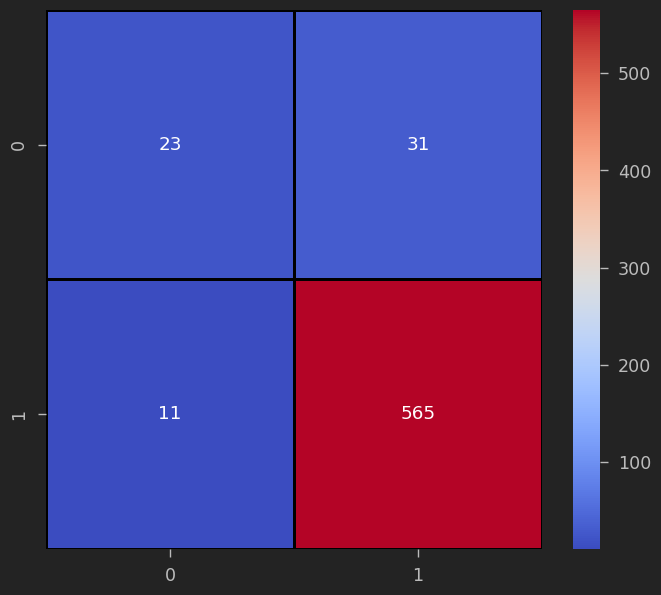

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
#predict test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d", linewidths=1, linecolor="black")

In [43]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.68      0.43      0.52        54
           1       0.95      0.98      0.96       576

    accuracy                           0.93       630
   macro avg       0.81      0.70      0.74       630
weighted avg       0.92      0.93      0.93       630



              precision    recall  f1-score   support

           0       0.68      0.28      0.39        54
           1       0.94      0.99      0.96       576

    accuracy                           0.93       630
   macro avg       0.81      0.63      0.68       630
weighted avg       0.91      0.93      0.91       630



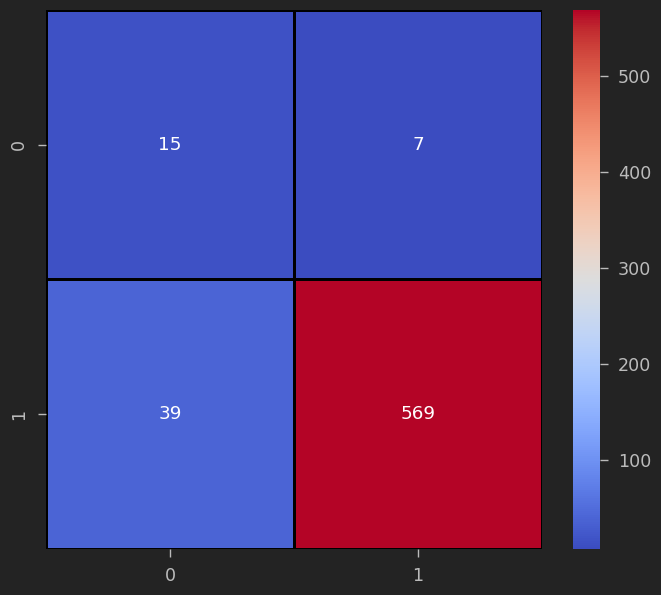

In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d", linewidths=1, linecolor="black")

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.20      0.29        54
           1       0.93      0.98      0.96       576

    accuracy                           0.92       630
   macro avg       0.73      0.59      0.62       630
weighted avg       0.89      0.92      0.90       630



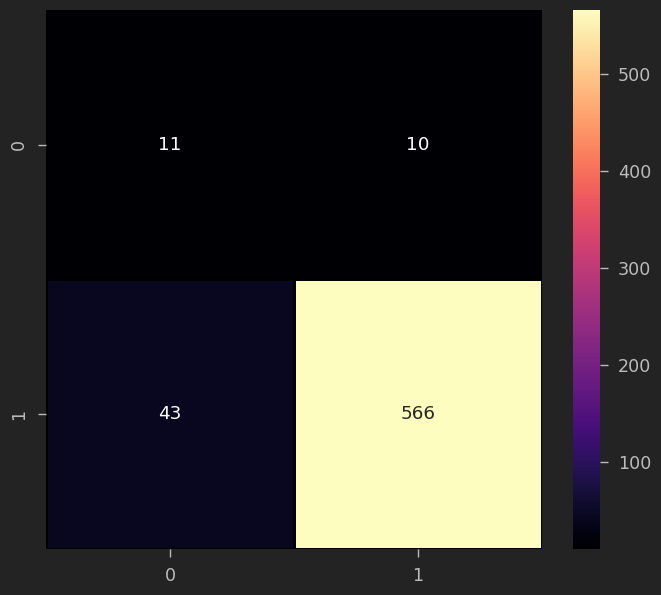

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, cmap="magma", fmt="d", linewidths=1, linecolor="black")

print(classification_report(y_test, y_pred))